In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle

In [23]:
# Charger les données depuis un fichier CSV
file_path = "./audi.csv"
data = pd.read_csv(file_path)

# Afficher les 5 premières lignes
print(data.head())

  model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0


In [24]:
data['model'] = data['model'].str.strip()

In [25]:
# Résumé statistique des données
print(data.describe())

               year          price        mileage           tax           mpg  \
count  10668.000000   10668.000000   10668.000000  10668.000000  10668.000000   
mean    2017.100675   22896.685039   24827.244001    126.011436     50.770022   
std        2.167494   11714.841888   23505.257205     67.170294     12.949782   
min     1997.000000    1490.000000       1.000000      0.000000     18.900000   
25%     2016.000000   15130.750000    5968.750000    125.000000     40.900000   
50%     2017.000000   20200.000000   19000.000000    145.000000     49.600000   
75%     2019.000000   27990.000000   36464.500000    145.000000     58.900000   
max     2020.000000  145000.000000  323000.000000    580.000000    188.300000   

         engineSize  
count  10668.000000  
mean       1.930709  
std        0.602957  
min        0.000000  
25%        1.500000  
50%        2.000000  
75%        2.000000  
max        6.300000  


In [26]:
# Vérifier les informations générales (types, colonnes, nulls)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None


In [27]:
# Vérifier la présence de valeurs nulles
print(data.isnull().sum())

# Supprimer les valeurs nulles
data = data.dropna()

# Vérifier qu'il ne reste plus de valeurs nulles
print(data.isnull().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [28]:
# Colonnes catégoriques à encoder
categorical_columns = ['model', 'transmission', 'fuelType']

# Initialisation de l'encoder
encoder = OrdinalEncoder()

# Transformation des colonnes catégoriques
data[categorical_columns] = encoder.fit_transform(data[categorical_columns])

In [29]:
# Afficher le dictionnaire de mapping pour chaque colonne catégorique
for col, categories in zip(categorical_columns, encoder.categories_):
    print(f"Mapping pour la colonne {col}:")
    encoding_dict = dict(zip(categories, range(len(categories))))
    print(encoding_dict)
    if (col=="model"):
        encoding_model=encoding_dict
    elif (col=="transmission"):
        encoding_transmission=encoding_dict
    else:
        encoding_fuelType=encoding_dict
    print()


Mapping pour la colonne model:
{'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5, 'A7': 6, 'A8': 7, 'Q2': 8, 'Q3': 9, 'Q5': 10, 'Q7': 11, 'Q8': 12, 'R8': 13, 'RS3': 14, 'RS4': 15, 'RS5': 16, 'RS6': 17, 'RS7': 18, 'S3': 19, 'S4': 20, 'S5': 21, 'S8': 22, 'SQ5': 23, 'SQ7': 24, 'TT': 25}

Mapping pour la colonne transmission:
{'Automatic': 0, 'Manual': 1, 'Semi-Auto': 2}

Mapping pour la colonne fuelType:
{'Diesel': 0, 'Hybrid': 1, 'Petrol': 2}



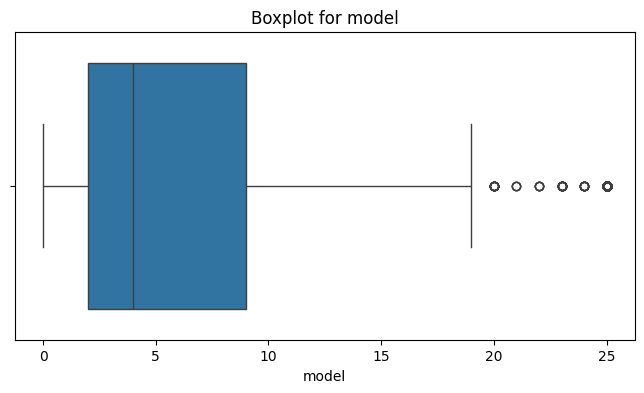

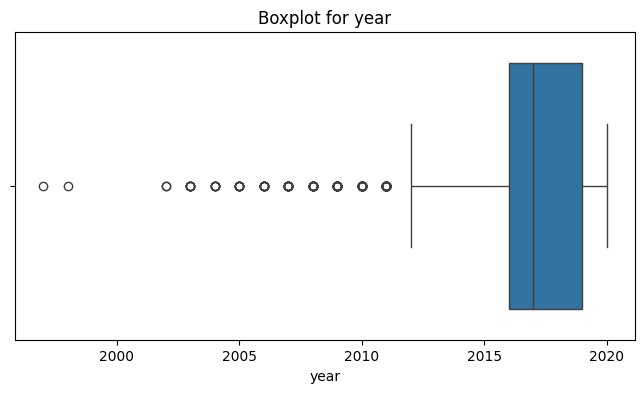

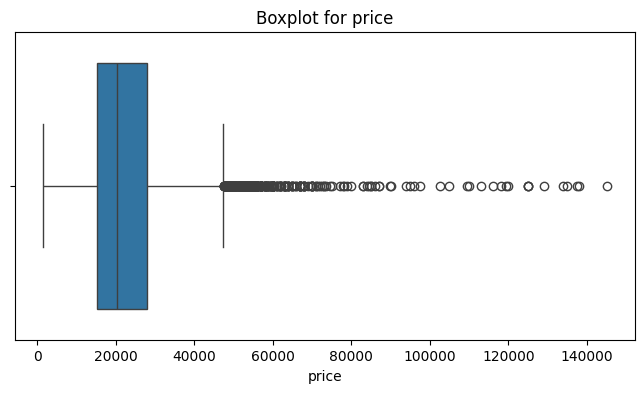

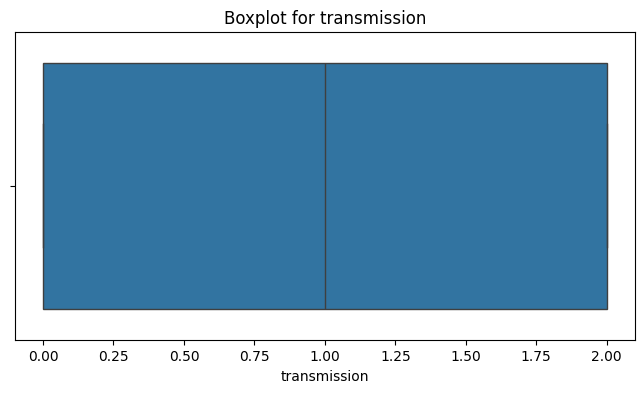

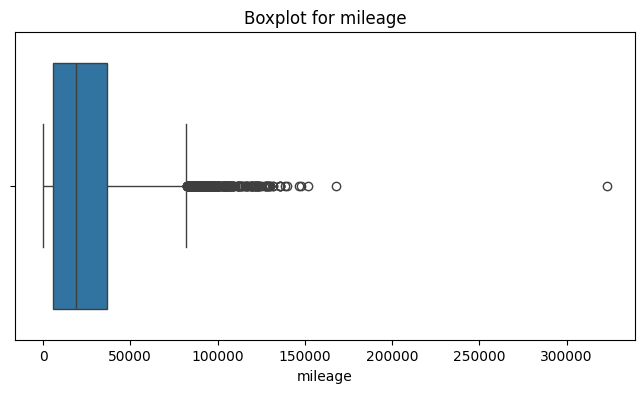

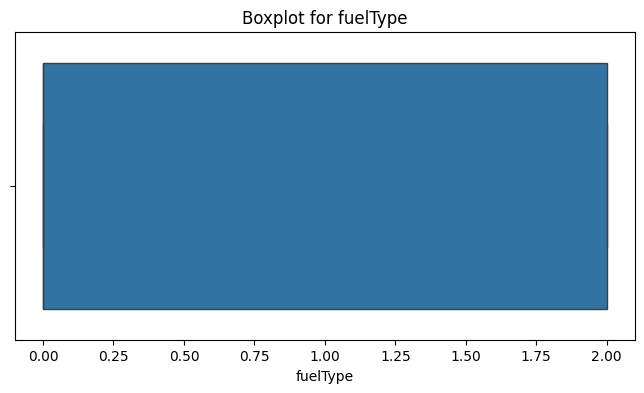

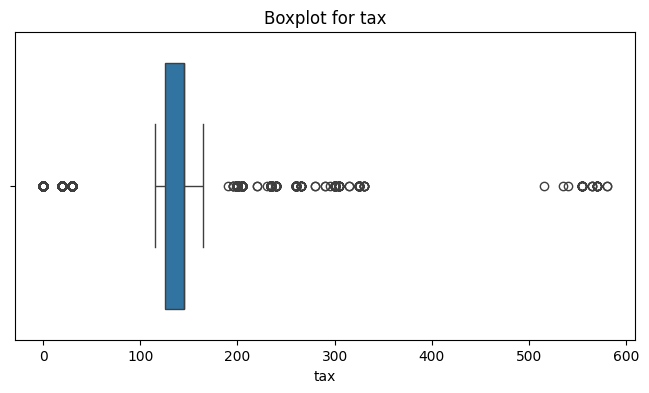

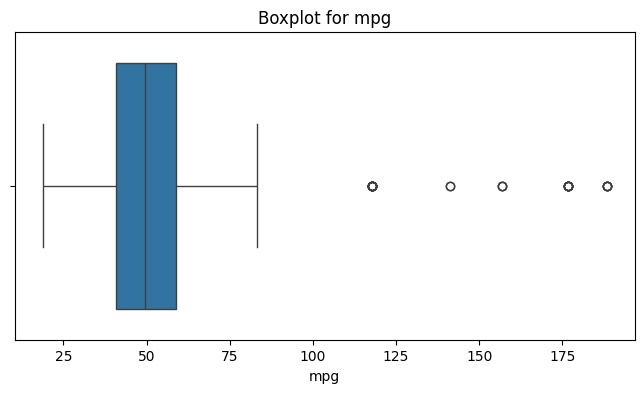

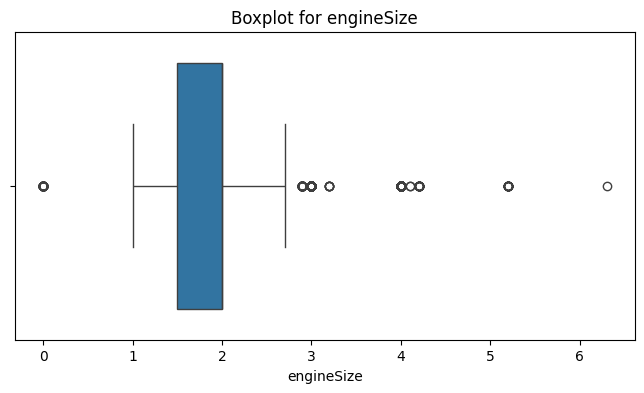

In [30]:
# Colonnes numériques uniquement
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Tracer un boxplot pour chaque colonne numérique
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

In [31]:
# Détection des outliers via l'IQR (Interquartile Range)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Suppression des outliers (1.5 * IQR)
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Vérifier les dimensions après suppression
print(data.shape)


(6003, 9)


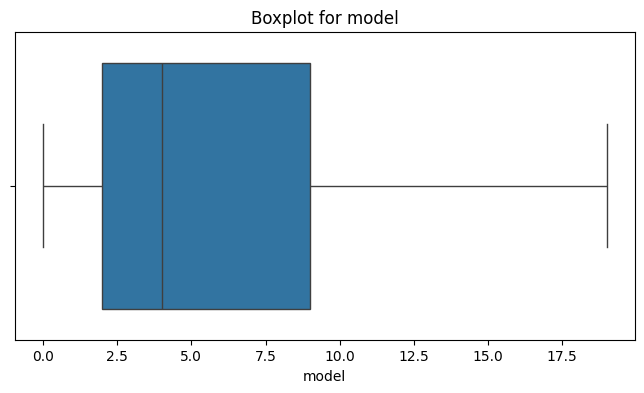

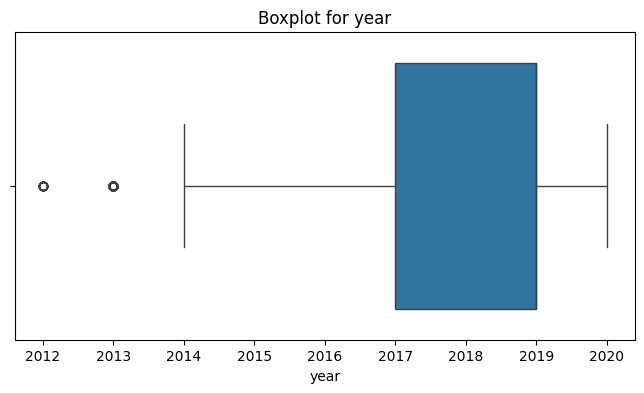

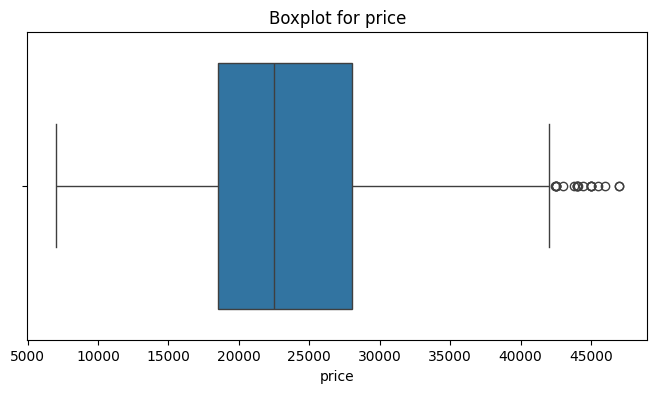

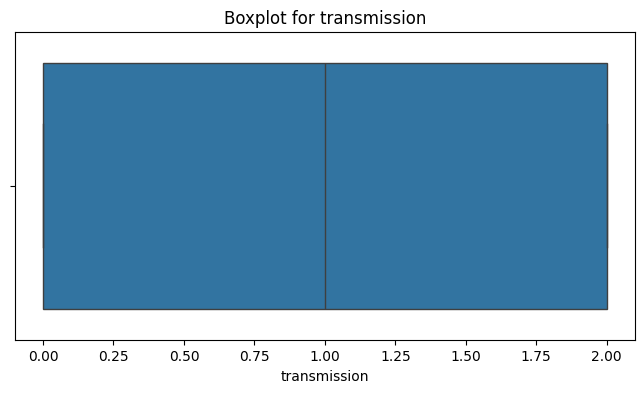

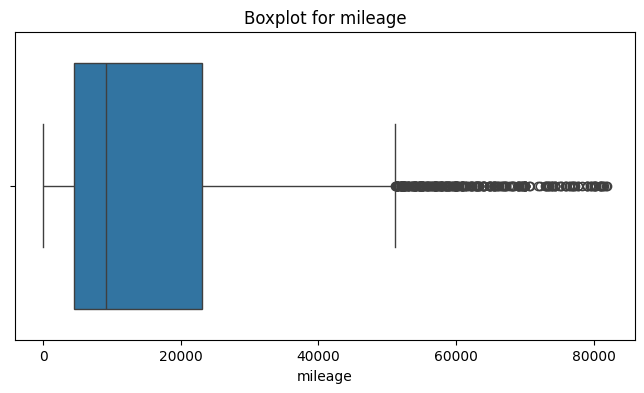

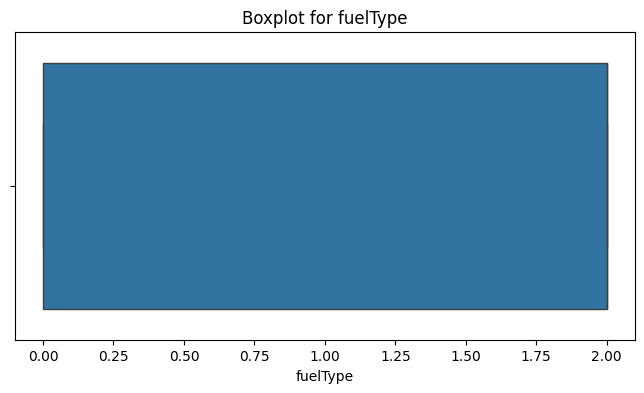

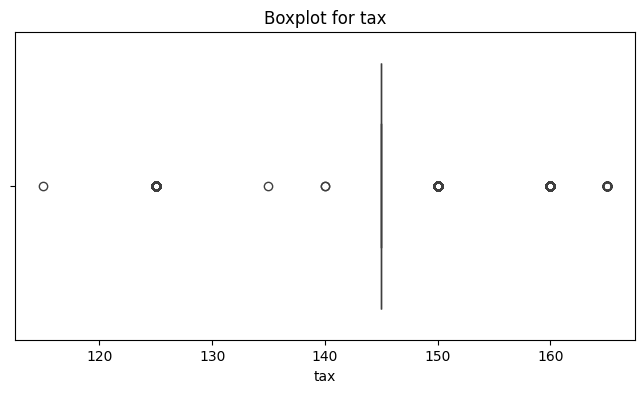

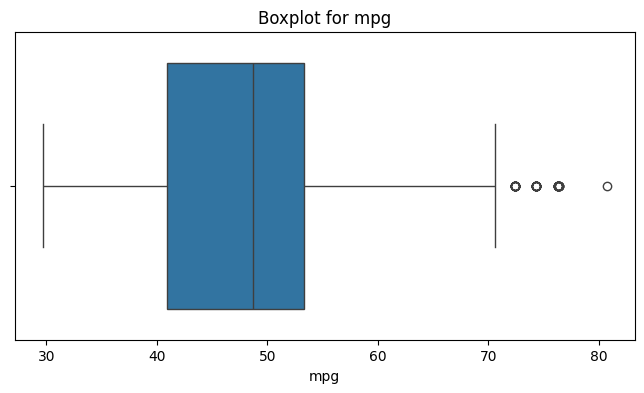

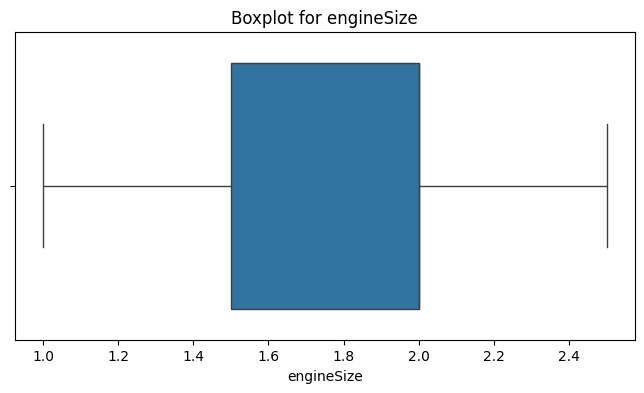

In [32]:
# Colonnes numériques uniquement
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Tracer un boxplot pour chaque colonne numérique
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

In [33]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.0,2017,12500,1.0,15735,2.0,150,55.4,1.4
3,3.0,2017,16800,0.0,25952,0.0,145,67.3,2.0
4,2.0,2019,17300,1.0,1998,2.0,145,49.6,1.0
10,2.0,2017,16100,1.0,28955,2.0,145,58.9,1.4
11,5.0,2016,16500,0.0,52198,0.0,125,57.6,2.0
...,...,...,...,...,...,...,...,...,...
10663,2.0,2020,16999,1.0,4018,2.0,145,49.6,1.0
10664,2.0,2020,16999,1.0,1978,2.0,150,49.6,1.0
10665,2.0,2020,17199,1.0,609,2.0,150,49.6,1.0
10666,9.0,2017,19499,0.0,8646,2.0,150,47.9,1.4


In [34]:
# Définir les features (X) et la cible (y)
X = data.drop(columns=["price"])  # "price" est la cible
y = data["price"]

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Initialiser le scaler
scaler = StandardScaler()

# Standardisation des features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
# Initialiser PCA (explique 95% de la variance)
pca = PCA(n_components=2)

# Appliquer PCA sur les données
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Vérifier le nombre de composantes
print(f"Nombre de composantes principales : {pca.n_components_}")


Nombre de composantes principales : 2


In [37]:
# Obtenir l'importance des composantes principales pour chaque feature
pca_importance = pca.components_

# Associer chaque composante principale avec les colonnes d'origine
for i, component in enumerate(pca_importance):
    feature_contribution = {col: round(value, 3) for col, value in zip(X.columns, component)}
    print(f"Composante principale {i+1} : {feature_contribution}")

Composante principale 1 : {'model': -0.131, 'year': -0.555, 'transmission': -0.019, 'mileage': 0.553, 'fuelType': -0.226, 'tax': -0.251, 'mpg': 0.504, 'engineSize': 0.009}
Composante principale 2 : {'model': -0.446, 'year': -0.027, 'transmission': 0.118, 'mileage': -0.032, 'fuelType': 0.579, 'tax': -0.162, 'mpg': 0.085, 'engineSize': -0.646}


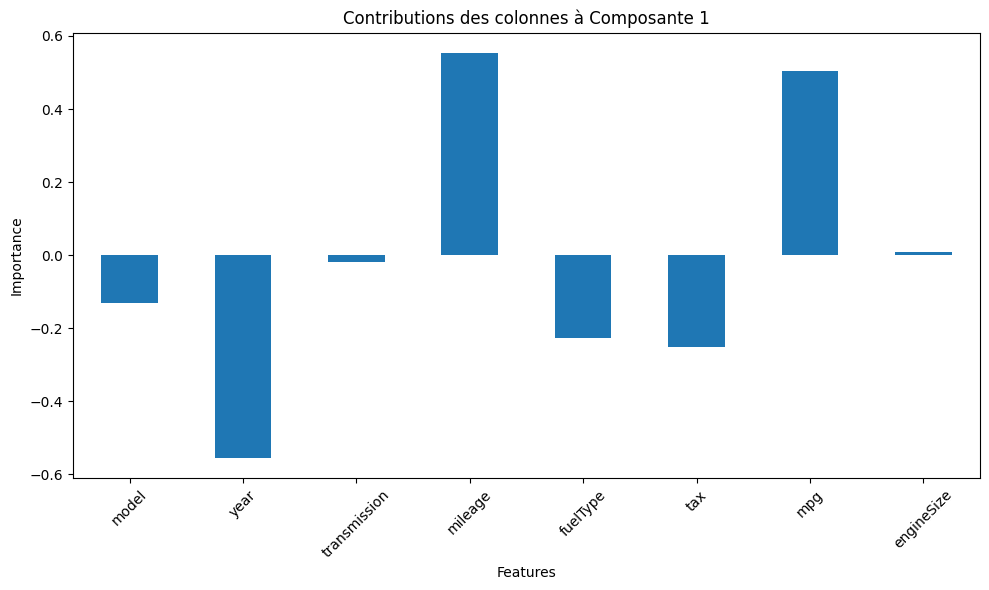

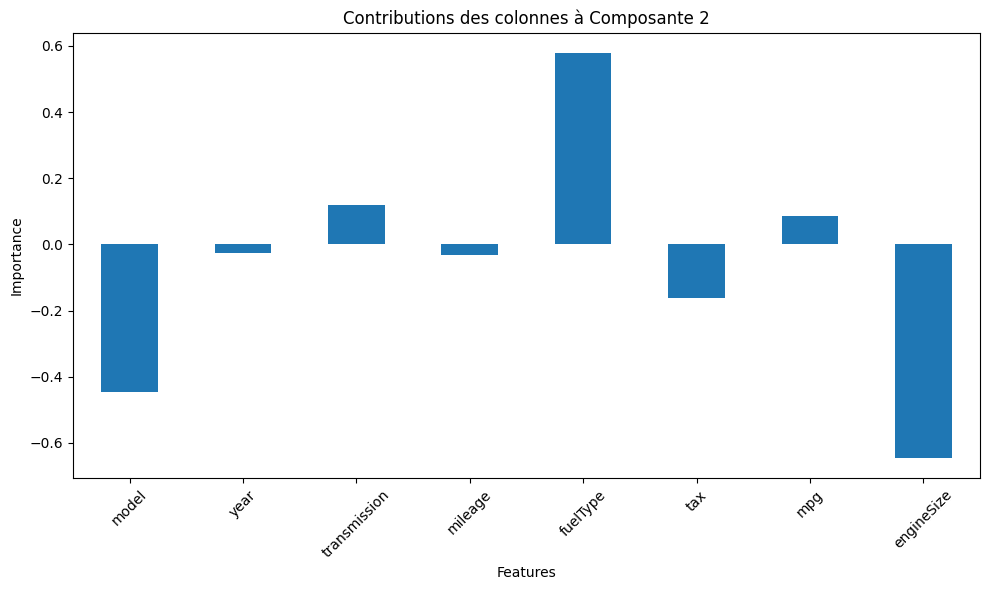

In [38]:
# Créer un DataFrame des contributions des colonnes aux composantes principales
pca_components_df = pd.DataFrame(
    pca.components_, 
    columns=X.columns, 
    index=[f"Composante {i+1}" for i in range(pca.n_components_)]
)

# Tracer un barplot pour chaque composante principale
for i, row in pca_components_df.iterrows():
    plt.figure(figsize=(10, 6))
    row.plot(kind='bar')
    plt.title(f"Contributions des colonnes à {i}")
    plt.ylabel("Importance")
    plt.xlabel("Features")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [39]:
# Initialiser le modèle XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Entraîner le modèle
xgb_model.fit(X_train_pca, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [40]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Initialiser le modèle XGBoost
xgb_model = XGBRegressor(random_state=42)

# Définir la grille des hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Configurer GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Métrique d'évaluation
    verbose=1,
    n_jobs=-1  # Utiliser tous les cœurs disponibles
)

# Lancer la recherche d'hyperparamètres
grid_search.fit(X_train_pca, y_train)

# Meilleurs paramètres
best_params = grid_search.best_params_
print("Meilleurs paramètres :", best_params)

# Meilleur modèle
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Meilleurs paramètres : {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}


In [41]:
# Prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test_pca)

# Calculer le score RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) : {rmse}")


Root Mean Squared Error (RMSE) : 2550.684481386042


In [42]:
# Regrouper tous les objets dans un dictionnaire
all_objects = {
    'encoding_fuelType': encoding_fuelType,
    'encoding_model': encoding_model,
    'encoding_transmission': encoding_transmission,
    'pca_model': pca,
    'scaler_model': scaler,
    'xgboost_model': best_model
}

# Sauvegarder le dictionnaire dans un seul fichier .pkl en hprod
with open('./all_models.pkl', 'wb') as f:
    pickle.dump(all_objects, f)

# Sauvegarder le dictionnaire dans un seul fichier .pkl en prd
with open('../prd/all_models.pkl', 'wb') as f:
    pickle.dump(all_objects, f)
